In [1]:
%load_ext autoreload
%autoreload 2

In [139]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms.v2 import Resize

from src.data_processing import CylindersProliv, CylindersTest, CylindersTrain, show_image

In [140]:
data_folder = Path("./data")
train_ds = CylindersTrain(data_folder / "train")
test_ds = CylindersTest(data_folder / "test")
proliv_ds = CylindersProliv(data_folder / "proliv")

In [141]:
print(f"Number of train (w/o anomalies) images: {len(train_ds)}")
print(f"Number of anomalies images: {len(proliv_ds)}")
print(f"Number of test images: {len(test_ds)}")

Number of train (w/o anomalies) images: 10000
Number of anomalies images: 154
Number of test images: 3794


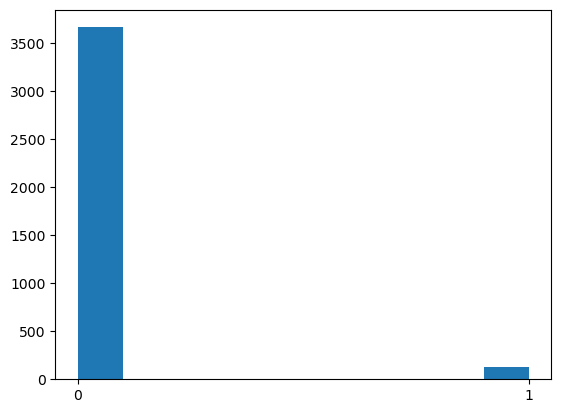

In [142]:
test_labels = list(test_ds.labels.values())
plt.hist(test_labels);

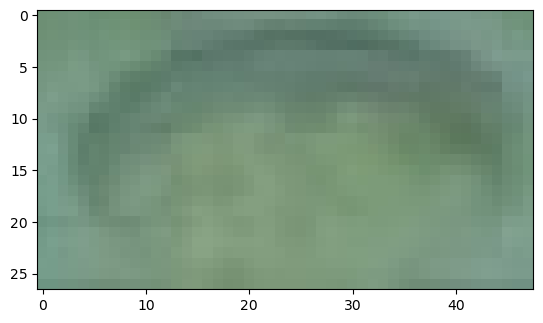

In [143]:
# Train image example
show_image(train_ds[random.randint(0, len(train_ds))])

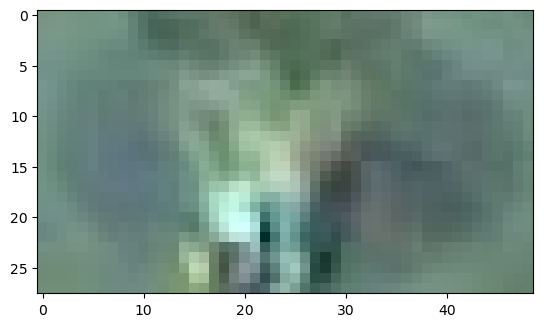

In [144]:
# Anomaly image example
show_image(proliv_ds[random.randint(0, len(proliv_ds))])

Label: 1


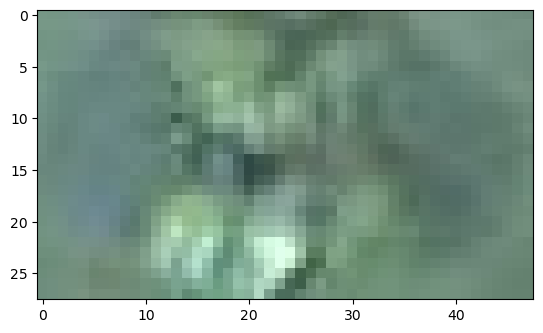

In [180]:
# Test image and label example
img, label = test_ds[random.randint(0, len(test_ds))]
print(f"Label: {label}")
show_image(img)

In [146]:
print(f"Original images sizes: {img.size()}")

Original images sizes: torch.Size([3, 27, 48])


In [147]:
# Analyze size of images

# Train
train_imgs_size = np.unique(np.array([img.shape for img in train_ds.images]), axis=0)
assert np.all(train_imgs_size[:, 0] == 3)  # Check that all images have 3 channels
print(f"Images in train split has {len(train_imgs_size)} different sizes")
print(f"Width: min={np.min(train_imgs_size[:, 2])}, max={np.max(train_imgs_size[:, 2])}")
print(f"Height: min={np.min(train_imgs_size[:, 1])}, max={np.max(train_imgs_size[:, 1])}")
print("=" * 25)

# Test
test_imgs_size = np.unique(np.array([img.shape for img in test_ds.images]), axis=0)
assert np.all(test_imgs_size[:, 0] == 3)  # Check that all images have 3 channels
print(f"Images in test split has {len(test_imgs_size)} different sizes")
print(f"Width: min={np.min(test_imgs_size[:, 2])}, max={np.max(test_imgs_size[:, 2])}")
print(f"Height: min={np.min(test_imgs_size[:, 1])}, max={np.max(test_imgs_size[:, 1])}")
print("=" * 25)

# Proliv
proliv_imgs_size = np.unique(np.array([img.shape for img in proliv_ds.images]), axis=0)
assert np.all(proliv_imgs_size[:, 0] == 3)  # Check that all images have 3 channels
print(f"Images in proliv split has {len(proliv_imgs_size)} different sizes")
print(f"Width: min={np.min(proliv_imgs_size[:, 2])}, max={np.max(proliv_imgs_size[:, 2])}")
print(f"Height: min={np.min(proliv_imgs_size[:, 1])}, max={np.max(proliv_imgs_size[:, 1])}")

Images in train split has 85 different sizes
Width: min=43, max=57
Height: min=24, max=40
Images in test split has 118 different sizes
Width: min=39, max=72
Height: min=23, max=40
Images in proliv split has 11 different sizes
Width: min=47, max=51
Height: min=27, max=30


In [148]:
# So let's resize all images in all splits to max size (40, 72)
# For example
resized_train_ds = CylindersTrain(data_folder / "train", Resize((40, 72)))
assert len(np.unique(np.array([img.shape for img in resized_train_ds.images]), axis=0)) == 1